Importing the libraries that I will need to do the predictions

In [1]:
from sklearn.model_selection import train_test_split 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import warnings

%matplotlib inline

warnings.filterwarnings(action="ignore")

Analyzing the dataset

In [2]:
testing_data = pd.read_csv('test.csv')
training_data = pd.read_csv('train.csv')

In [3]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
training_data['Survived'] = training_data['Survived'].astype('int')
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_labels = training_data['Survived']

In [6]:
train_data = training_data.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)

In [7]:
print(train_data.head(2))
print(train_labels.head(2))

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
0    0
1    1
Name: Survived, dtype: int64


In [8]:
for column in train_data.columns: 
    print(column , ":" , train_data[column].isnull().sum())

Pclass : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Fare : 0
Embarked : 2


Encoding the String variables to numeric and removing null variables

In [9]:
train_data['Sex'] = train_data.Sex.map({"male":1, "female":0})
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data.Embarked.map({"C":0, "Q":1, "S" :2})
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].median())

In [10]:
for col in train_data.columns: 
    print(col , ":" , train_data[col].isnull().sum())


Pclass : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Fare : 0
Embarked : 0


In [11]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2.0
1,1,0,38.0,1,0,71.2833,0.0
2,3,0,26.0,0,0,7.9250,2.0
3,1,0,35.0,1,0,53.1000,2.0
4,3,1,35.0,0,0,8.0500,2.0


One hot Encoding

In [12]:
X = np.asarray(train_data[['Pclass', 'Sex', 'Age', 'SibSp',
                           'Parch', 'Fare', 'Embarked']])
X[0:5]

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ,  2.    ],
       [ 1.    ,  0.    , 35.    ,  1.    ,  0.    , 53.1   ,  2.    ],
       [ 3.    ,  1.    , 35.    ,  0.    ,  0.    ,  8.05  ,  2.    ]])

In [13]:
y = np.asarray(training_data['Survived'])
y [0:5]

array([0, 1, 1, 1, 0])

Normalizing the data

In [14]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.82737724,  0.73769513, -0.56573646,  0.43279337, -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.66386103,  0.43279337, -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.25833709, -0.4745452 , -0.47367361,
        -0.48885426,  0.58595414],
       [-1.56610693, -1.35557354,  0.4333115 ,  0.43279337, -0.47367361,
         0.42073024,  0.58595414],
       [ 0.82737724,  0.73769513,  0.4333115 , -0.4745452 , -0.47367361,
        -0.48633742,  0.58595414]])

**Building the Model**

Spliting the data into training and validation datasets

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


Building a Logistic Regression model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Model Evaluation

In [17]:
from sklearn.metrics import jaccard_score
yhat = LR.predict(X_test)
jaccard_score(y_test, yhat)

0.5616438356164384

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 41  19]
 [ 13 106]]


Confusion matrix, without normalization
[[ 41  19]
 [ 13 106]]


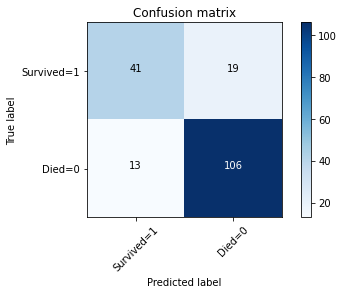

In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Died=0'],normalize= False,  title='Confusion matrix')

In [20]:
test_data = testing_data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
test_data = test_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

In [22]:
for col in test_data.columns: 
    print(col , ":" , test_data[col].isnull().sum())

Pclass : 0
Sex : 0
Age : 86
SibSp : 0
Parch : 0
Fare : 1
Embarked : 0


In [23]:
test_data['Sex'] = test_data.Sex.map({"male":0, "female":1})
test_data['Embarked'] = test_data.Embarked.map({"C":0, "Q":1, "S" :2})
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [24]:
test_data.shape

(418, 7)

In [25]:
test_x = np.asarray(test_data[['Pclass', 'Sex', 'Age', 'SibSp',
                           'Parch', 'Fare', 'Embarked']])
test_x

array([[ 3.  ,  0.  , 34.5 , ...,  0.  ,  7.83,  1.  ],
       [ 3.  ,  1.  , 47.  , ...,  0.  ,  7.  ,  2.  ],
       [ 2.  ,  0.  , 62.  , ...,  0.  ,  9.69,  1.  ],
       ...,
       [ 3.  ,  0.  , 38.5 , ...,  0.  ,  7.25,  2.  ],
       [ 3.  ,  0.  , 27.  , ...,  0.  ,  8.05,  2.  ],
       [ 3.  ,  0.  , 27.  , ...,  1.  , 22.36,  0.  ]])

In [26]:
test_x = preprocessing.StandardScaler().fit(test_x).transform(test_x)
test_x

array([[ 0.87, -0.76,  0.39, ..., -0.4 , -0.5 , -0.47],
       [ 0.87,  1.32,  1.37, ..., -0.4 , -0.51,  0.7 ],
       [-0.32, -0.76,  2.55, ..., -0.4 , -0.46, -0.47],
       ...,
       [ 0.87, -0.76,  0.7 , ..., -0.4 , -0.51,  0.7 ],
       [ 0.87, -0.76, -0.2 , ..., -0.4 , -0.49,  0.7 ],
       [ 0.87, -0.76, -0.2 , ...,  0.62, -0.24, -1.64]])

In [27]:
pred_t = LR.predict(test_x)

In [28]:
pred_t = pred_t.astype(int)
pred_t

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [29]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = pred_t
submission.to_csv('gender_submission.csv', index=False)